In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data = data.set_index('date')
data.head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder  = LabelEncoder()
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])
print(data)

            precipitation  temp_max  temp_min  wind  weather  weather_encoded
date                                                                         
2012-01-01            0.0      12.8       5.0   4.7  drizzle                0
2012-01-02           10.9      10.6       2.8   4.5     rain                2
2012-01-03            0.8      11.7       7.2   2.3     rain                2
2012-01-04           20.3      12.2       5.6   4.7     rain                2
2012-01-05            1.3       8.9       2.8   6.1     rain                2
...                   ...       ...       ...   ...      ...              ...
2015-12-27            8.6       4.4       1.7   2.9     rain                2
2015-12-28            1.5       5.0       1.7   1.3     rain                2
2015-12-29            0.0       7.2       0.6   2.6      fog                1
2015-12-30            0.0       5.6      -1.0   3.4      sun                4
2015-12-31            0.0       5.6      -2.1   3.5      sun    

In [ ]:
Weather_mapping = dict(zip(label_encoder.classes_,range(len(label_encoder.classes_))))

for key,value in Weather_mapping.items():
  print(f"{key} : {value}")

drizzle : 0
fog : 1
rain : 2
snow : 3
sun : 4


In [ ]:
x = data.drop(columns = ['weather','weather_encoded'])
y = data['weather_encoded']

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 12,stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.8293515358361775


Cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,x_train_scaled,y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

Cross-Validation Scores: [0.78205128 0.79487179 0.76495726 0.78540773 0.73819742]
Mean Accuracy: 0.7730970984189869
Standard Deviation: 0.019950490950856013


Apply hyperparameter tuning to improve the accuracy

In [ ]:
parameter = {
    'penalty': ['l1', 'l2'],
    'C': [1,10,15,20],
    'solver': ['liblinear', 'saga'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

classifier = GridSearchCV(model,param_grid=parameter,cv=5)

In [ ]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 15, 20], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
res = pd.DataFrame(classifier.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052671,0.020624,0.005163,0.003140,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.820513,0.833333,0.820513,0.841202,0.806867,0.824486,0.011830,4
1,0.119267,0.017375,0.006895,0.004993,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.837607,0.820513,0.803419,0.819742,0.759657,0.808188,0.026567,8
2,0.014774,0.003136,0.004637,0.002023,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.807692,0.820513,0.786325,0.828326,0.772532,0.803078,0.020864,16
3,0.102813,0.020929,0.003455,0.000089,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.837607,0.820513,0.803419,0.819742,0.759657,0.808188,0.026567,8
4,0.048027,0.024767,0.003348,0.000097,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.816239,0.833333,0.824786,0.841202,0.815451,0.826202,0.009927,1


In [ ]:
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
res_column = res[['param_C','param_penalty','param_solver','mean_test_score']]
res_column.head()

,param_C,param_penalty,param_solver,mean_test_score
0,1,l1,liblinear,0.824486
1,1,l1,saga,0.808188
2,1,l2,liblinear,0.803078
3,1,l2,saga,0.808188
4,10,l1,liblinear,0.826202


In [ ]:
best_res = classifier.best_params_
best_res

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
best_score = classifier.best_score_
best_score

0.8262022669747993

Build the model using above parameters

In [ ]:
classifier = LogisticRegression(C = best_res['C'],
                                penalty = best_res['penalty'],
                                solver = best_res['solver'])
classifier.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [ ]:
y_pred = classifier.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8498293515358362


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[  0,   0,   0,   0,  11],
       [  0,   0,   1,   0,  19],
       [  0,   0, 123,   0,   6],
       [  0,   0,   5,   0,   0],
       [  0,   0,   2,   0, 126]])

<Axes: >

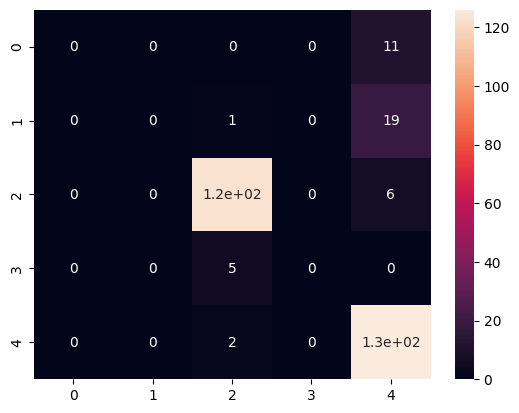

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot = True)

In [ ]:
data['weather_encoded'].value_counts()

,count
weather_encoded,
2,641
4,640
1,101
0,53
3,26


**SVC**

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(x_train_scaled,y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.7986348122866894


Hyperparameter tuning

In [ ]:
parameters= {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.1]
}

In [ ]:
classifier = GridSearchCV(model,parameters,cv = 5)
classifier.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1],
                         'kernel': ['linear', 'rbf']})

In [ ]:
best_pred = pd.DataFrame(classifier.cv_results_)
best_pred.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046969,0.021109,0.010393,0.004072,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.752137,0.790598,0.773504,0.746781,0.695279,0.751660,0.032237,9
1,0.059933,0.002926,0.019061,0.003139,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.726496,0.735043,0.730769,0.751073,0.699571,0.728590,0.016723,11
2,0.041077,0.015290,0.010417,0.004296,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.752137,0.790598,0.773504,0.746781,0.695279,0.751660,0.032237,9
3,0.060371,0.006759,0.025568,0.009884,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.730769,0.726496,0.735043,0.755365,0.686695,0.726874,0.022397,12
4,0.039059,0.006115,0.006936,0.001367,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.803419,0.807692,0.773504,0.781116,0.746781,0.782502,0.022050,5


In [ ]:
best_score = classifier.best_score_
best_score

0.8450166905102527

In [ ]:
best_perms = classifier.best_params_
best_perms

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

build the model using above HP values

In [ ]:
model = SVC(C = best_perms['C'],gamma = best_perms['gamma'],kernel = best_perms['kernel'])
model.fit(x_train_scaled,y_train)

SVC(C=10, kernel='linear')

In [ ]:
y_pred = model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.8498293515358362
